# Параметрическая идентификация статистических моделей

## 1. Описание задачи

### 1.1. Задание
Идентифицировать параметры производственной функции по статистическим данным.

### 1.2. Порядок выполнения работы
1. Используя динамические ряды по выпуску продукции и затрат ресурсов, приведенные в таблице, выполните оценку параметров модели (1).
2. Выполните оценку параметров модели, предполагая, что α + β = 1.
3. Постройте графики полученных в п.1 и п.2 зависимостей Y(t), и исходного ряда (Yi)ᵢ₌₁ᴹ.

## 2. Непосредственное выполнение работы

### 2.1. Импорт библиотек

In [7]:
# Для работы с таблицами
import pandas as pd

# Для математических операций
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Для вывода
from IPython.display import display

### 2.2. Создание датафрейма с исходными для задачи данными

In [9]:
data = {
    "year": [1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950],
    "gdp_mln_usd": [83278, 90884, 83743, 91530, 101313, 116415, 127434, 136274, 146470, 145052, 140288, 142022, 149895, 147122, 163620],
    "capital_mln_usd": [234236, 254890, 217606, 221746, 228757, 250238, 266469, 266154, 269520, 263098, 252357, 262536, 285700, 277522, 307946],
    "labor_thous_people": [73426, 77568, 70460, 75131, 79694, 89276, 97056, 101633, 100124, 94920, 96671, 100072, 101304, 96784, 100352]
}

df = pd.DataFrame(data)

df1 = df.copy()

### 2.3. Оценка параметров модели

In [11]:
# Логарифмирование переменных
for col in df.columns[1:]:
    df[f"ln_{col}"] = np.log(df[col])

# Выбираем только логарифмированные столбцы
log_cols = [col for col in df.columns if col.startswith("ln_")]

In [12]:
df.head()

,year,gdp_mln_usd,capital_mln_usd,labor_thous_people,ln_gdp_mln_usd,ln_capital_mln_usd,ln_labor_thous_people
0,1936,83278,234236,73426,11.329940,12.364084,11.204033
1,1937,90884,254890,77568,11.417339,12.448587,11.258910
2,1938,83743,217606,70460,11.335508,12.290441,11.162800
3,1939,91530,221746,75131,11.424422,12.309288,11.226989
4,1940,101313,228757,79694,11.525970,12.340416,11.285950


In [13]:
# Число наблюдений
n = len(df)

# Вычисление элементов матрицы B
B = np.array([
    [n, df['ln_capital_mln_usd'].sum(), df['ln_labor_thous_people'].sum()],
    [df['ln_capital_mln_usd'].sum(), (df['ln_capital_mln_usd']**2).sum(), (df['ln_capital_mln_usd'] * df['ln_labor_thous_people']).sum()],
    [df['ln_labor_thous_people'].sum(), (df['ln_capital_mln_usd'] * df['ln_labor_thous_people']).sum(), (df['ln_labor_thous_people']**2).sum()]
])

# Вычисление элементов матрицы Z
Z = np.array([
    [df['ln_gdp_mln_usd'].sum()],
    [(df['ln_gdp_mln_usd'] * df['ln_capital_mln_usd']).sum()],
    [(df['ln_gdp_mln_usd'] * df['ln_labor_thous_people']).sum()]
])

# Вычисление обратной матрицы B
B_inv = np.linalg.inv(B)

# Вычисление коэффициентов C = B^(-1) * Z
C = np.dot(B_inv, Z)

# Извлекаем коэффициенты
A = np.exp(C[0, 0])  # Возвращаем A в экспоненциальном виде, т.к. ln(A) = C[0,0]
alpha = C[1, 0]
beta = C[2, 0]

# Вывод результатов
print(f"A = {A:.6f}, Alpha = {alpha:.6f}, Beta = {beta:.6f}")

A = 0.000064, Alpha = 0.358166, Beta = 1.481820


In [14]:
df['pred_gdp_mln_usd'] = A * (df['capital_mln_usd']**alpha)*(df['labor_thous_people']**beta)

In [15]:
display(df)

,year,gdp_mln_usd,capital_mln_usd,labor_thous_people,ln_gdp_mln_usd,ln_capital_mln_usd,ln_labor_thous_people,pred_gdp_mln_usd
0,1936,83278,234236,73426,11.329940,12.364084,11.204033,87529.182563
1,1937,90884,254890,77568,11.417339,12.448587,11.258910,97861.775005
2,1938,83743,217606,70460,11.335508,12.290441,11.162800,80197.793523
3,1939,91530,221746,75131,11.424422,12.309288,11.226989,88797.757130
4,1940,101313,228757,79694,11.525970,12.340416,11.285950,97991.424523
5,1941,116415,250238,89276,11.664917,12.430168,11.399488,119733.647937
6,1942,127434,266469,97056,11.755354,12.493013,11.483043,138600.119124
7,1943,136274,266154,101633,11.822423,12.491830,11.529124,148331.822719
8,1944,146470,269520,100124,11.894576,12.504398,11.514165,145734.534974
9,1945,145052,263098,94920,11.884848,12.480282,11.460790,133494.066020


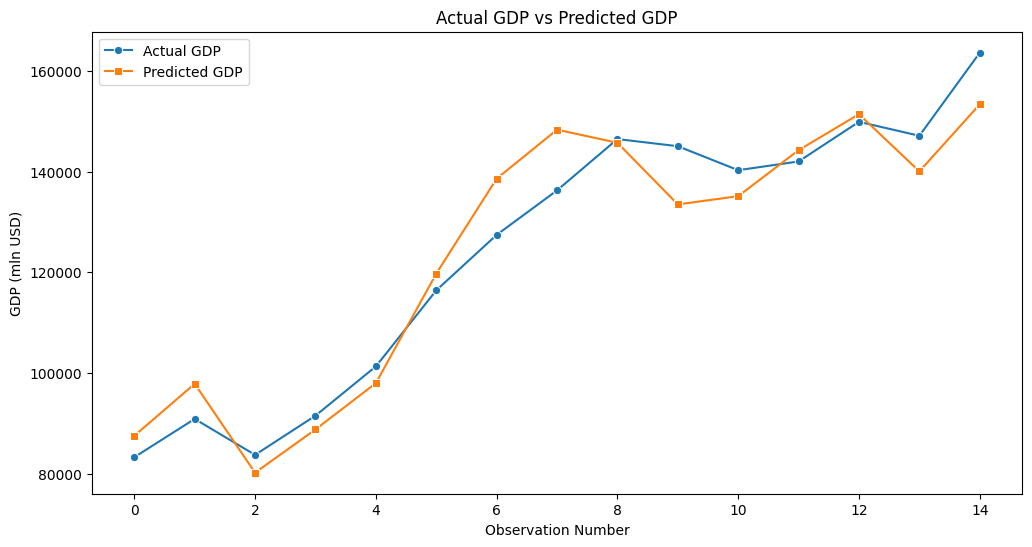

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['gdp_mln_usd'], marker="o", label="Actual GDP")
sns.lineplot(x=df.index, y=df['pred_gdp_mln_usd'], marker="s", label="Predicted GDP")

plt.xlabel("Observation Number")
plt.ylabel("GDP (mln USD)")
plt.title("Actual GDP vs Predicted GDP")
plt.legend()
plt.grid(False)

plt.show()

### 2.4. Оценка параметров модели с учётом ограничения `alpha + beta = 1`

In [18]:
df1.head()

,year,gdp_mln_usd,capital_mln_usd,labor_thous_people
0,1936,83278,234236,73426
1,1937,90884,254890,77568
2,1938,83743,217606,70460
3,1939,91530,221746,75131
4,1940,101313,228757,79694


In [19]:
df1['Y/L'] = df1['gdp_mln_usd'] / df1['labor_thous_people']
df1['K/L'] = df1['capital_mln_usd'] / df1['labor_thous_people']
df1['z'] = np.log(df1['Y/L'])
df1['u'] = np.log(df1['K/L'])

In [20]:
# Число наблюдений
n = len(df1)

# Вычисление элементов матрицы B
B = np.array([
    [n, df1['u'].sum()],
    [df1['u'].sum(), (df1['u']**2).sum()]
])

# Вычисление элементов матрицы Z
Z = np.array([
    [df1['z'].sum()],
    [(df1['u'] * df1['z']).sum()]
])

# Вычисление обратной матрицы B
B_inv = np.linalg.inv(B)

# Вычисление коэффициентов C = B^(-1) * Z
C = np.dot(B_inv, Z)

# Извлекаем коэффициенты
A1 = np.exp(C[0, 0])
alpha1 = C[1, 0]

# Так как накладывается ограничение α + β = 1, то:
beta1 = 1 - alpha1

# Вывод результатов
print(f"A = {A1:.6f}, Alpha = {alpha1:.6f}, Beta = {beta1:.6f}")

A = 3.051609, Alpha = -0.772906, Beta = 1.772906


In [21]:
df1['pred_gdp_mln_usd'] = A1 * (df1['capital_mln_usd']**alpha1)*(df1['labor_thous_people']**beta1)

In [22]:
display(df1)

,year,gdp_mln_usd,capital_mln_usd,labor_thous_people,Y/L,K/L,z,u,pred_gdp_mln_usd
0,1936,83278,234236,73426,1.134176,3.190096,0.125906,1.160051,91408.330501
1,1937,90884,254890,77568,1.171669,3.286020,0.158429,1.189677,94378.693115
2,1938,83743,217606,70460,1.188518,3.088362,0.172707,1.127641,89940.981018
3,1939,91530,221746,75131,1.218272,2.951458,0.197434,1.082299,99323.933073
4,1940,101313,228757,79694,1.271275,2.870442,0.240020,1.054466,107647.300439
5,1941,116415,250238,89276,1.303990,2.802971,0.265429,1.030680,122827.761859
6,1942,127434,266469,97056,1.312995,2.745518,0.272310,1.009970,135686.268951
7,1943,136274,266154,101633,1.340844,2.618775,0.293299,0.962707,147371.317420
8,1944,146470,269520,100124,1.462886,2.691862,0.380411,0.990233,142127.024912
9,1945,145052,263098,94920,1.528150,2.771787,0.424058,1.019492,131727.023320


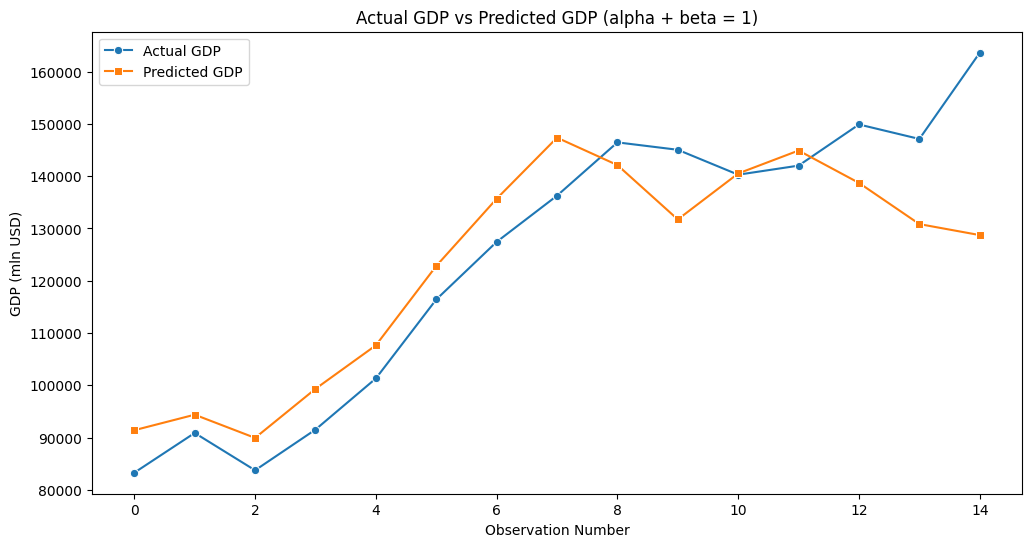

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df1['gdp_mln_usd'], marker="o", label="Actual GDP")
sns.lineplot(x=df.index, y=df1['pred_gdp_mln_usd'], marker="s", label="Predicted GDP")

plt.xlabel("Observation Number")
plt.ylabel("GDP (mln USD)")
plt.title("Actual GDP vs Predicted GDP (alpha + beta = 1)")
plt.legend()
plt.grid(False)

plt.show()